<a href="https://colab.research.google.com/github/alonacode/AI/blob/main/My_of_%D0%94%D0%97_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оберіть одне завдання на вибір

# Завдання 1

За допомогою сегментації зображень замінітть фон для зображення https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/humans.jpg

на фон з https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/forest.jpg

* отримайте маску для зображення людей, де `True` - піксель класу людини, `False` - піксель іншого класу
* зробіть зображення лісу такого ж розміру як і зображення людей
* застосуйте маску щоб змінити значення пікселів зображення лісу на пікселі зображення людей
* Якщо результат поганий можете спробувати використати маску для класу `__background`

Варіант 1

In [74]:
import torch
from torchvision.models.segmentation import deeplabv3_resnet50, DeepLabV3_ResNet50_Weights
from torchvision import transforms
from torchvision.io.image import read_image
import numpy as np
from PIL import Image
from torchvision.transforms import functional as F


img = read_image('/content/humans.jpg')
img_forest = read_image('/content/forest.jpg')
weights = DeepLabV3_ResNet50_Weights.DEFAULT
model = deeplabv3_resnet50(weights=weights)
model.eval()
transformer = weights.transforms(resize_size=520)
batch2 = transformer(img)
batch = batch2.unsqueeze(0)

batch2.size()

with torch.no_grad():
  pred = model(batch)['out']

# pred

In [75]:
batch2.size()

torch.Size([3, 520, 924])

In [69]:
batch.size()

torch.Size([1, 3, 520, 924])

In [66]:
img.size()

torch.Size([3, 540, 960])

In [46]:
pred.size()

torch.Size([1, 21, 520, 924])

In [11]:
mask = pred.argmax(dim=1)

mask = mask[0]

In [49]:
mask.size()

torch.Size([520, 924])

In [14]:
mask.unique()

tensor([ 0, 15])

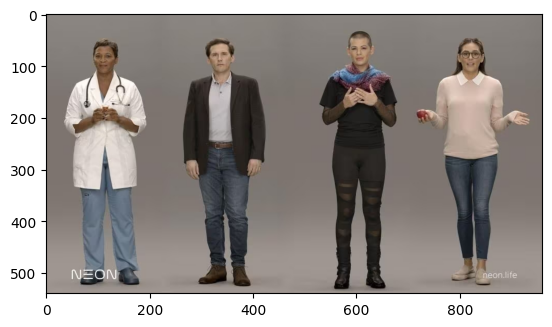

In [57]:
import matplotlib.pyplot as plt

plt.imshow(img.permute(1, 2, 0))

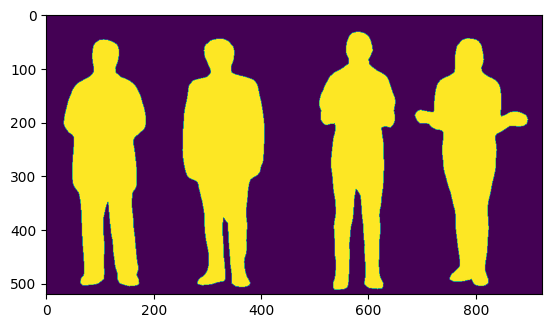

In [17]:
plt.imshow(mask)

In [19]:
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
class_to_idx

{'__background__': 0,
 'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20}

In [21]:
mask_human = mask == class_to_idx['person']
mask_human

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

In [76]:
img_forest_resized = F.resize(img_forest, size=(520, 924))

img_forest_resized.size()

torch.Size([3, 520, 924])

In [77]:
mask_expanded = mask_human.unsqueeze(0).repeat(3, 1, 1)
mask_expanded.size()

torch.Size([3, 520, 924])

In [78]:
img_forest_np = np.array(img_forest_resized)
img_human_np = np.array(batch2)[:, :mask_human.shape[0], :mask_human.shape[1]]

In [79]:
final_img = img_forest_np.copy()

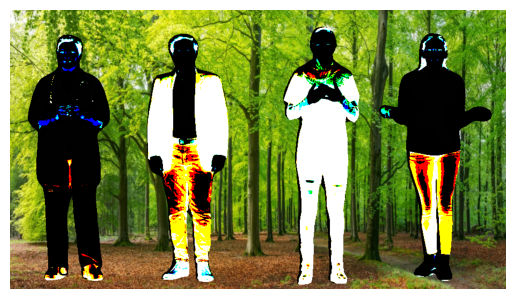

In [89]:
final_img[mask_expanded.numpy()] = img_human_np[mask_expanded.numpy()]

# 7. Виведення результату
final_img_rgb = final_img.transpose(1, 2, 0)


plt.imshow(final_img_rgb)
plt.axis('off')
plt.show()

Варіант 2

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 233M/233M [00:01<00:00, 143MB/s]


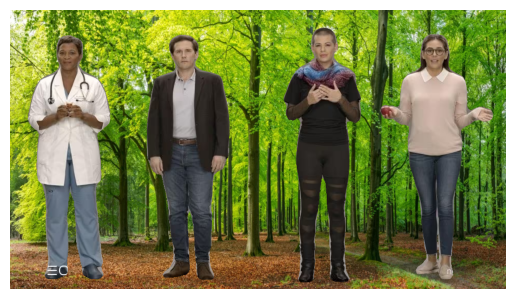

In [1]:
import torch
import requests
import numpy as np
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.models.segmentation import deeplabv3_resnet101

# Завантаження зображень
img_humans = Image.open(requests.get("https://github.com/HalyshAnton/IT-Step-Pyton-AI/raw/main/module5/images/humans.jpg", stream=True).raw)
img_forest = Image.open(requests.get("https://github.com/HalyshAnton/IT-Step-Pyton-AI/raw/main/module5/images/forest.jpg", stream=True).raw)

# Перетворення до тензорів
transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img_humans_tensor = transform(img_humans).unsqueeze(0)

# Сегментаційна модель
model = deeplabv3_resnet101(pretrained=True).eval()

# Сегментація зображення
with torch.no_grad():
    output = model(img_humans_tensor)['out'][0]
output_predictions = output.argmax(0).byte().cpu().numpy()

# Отримання маски для людей
# Клас людини у COCO – 15
mask_people = (output_predictions == 15)

# Зміна розміру лісу до розмірів зображення людей
img_forest_resized = img_forest.resize(img_humans.size)
img_forest_tensor = T.ToTensor()(img_forest_resized)

# Застосування маски до зображення лісу, щоб вставити людей
result_img = img_forest_tensor.clone()
result_img[:, mask_people] = T.ToTensor()(img_humans)[:, mask_people]

# Виведення результату
result_img = result_img.permute(1, 2, 0).numpy()  # Переміщуємо осі для коректного відображення
plt.imshow(result_img)
plt.axis('off')
plt.show()


# Завдання 2

Проведіть детекцію об'єктів для відео

https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/Highway%20driving%20during%20the%20day%20front%20view%20camera%20driving%20plate%204k%20footage.mp4

Підберіть параметри для якісного виявлення машин та знаків
Код для перетворення набору зображень у відео є нижче

[документація](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.ArtistAnimation.html)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure()
for result in results:
    frames.append([plt.imshow(result.plot())])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('output.mp4')
plt.show()

In [12]:
import torch
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pathlib import Path

# Завантаження моделі YOLOv5
model = torch.hub.load('ultralytics/yolov5', 'yolov5l')  # Використовуємо модель yolov5l для кращої точності

# Налаштування параметрів моделі
model.conf = 0.25  # Поріг впевненості
model.iou = 0.45  # Поріг Intersection Over Union

# Завантаження відео для обробки
video_path = "/content/Highway driving during the day front view camera driving plate 4k footage (1).mp4"  # Шлях до вашого відео
cap = cv2.VideoCapture(video_path)

# Параметри для збереження кадрів
output_folder = "frames"
os.makedirs(output_folder, exist_ok=True)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Змінна для зберігання кадрів
output_frames = []

# Обробка кожного кадру відео
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Виконання детекції об'єктів у кадрі
    results = model(frame)

    # Малювання рамок детекції на кадрі
    results.render()
    output_frame = results.ims[0]  # Використовуємо ims замість imgs

    # Збереження обробленого кадру як зображення
    frame_path = os.path.join(output_folder, f"frame_{frame_count:04d}.jpg")
    cv2.imwrite(frame_path, output_frame)
    output_frames.append(output_frame)  # Зберігаємо кадр у список

    frame_count += 1

cap.release()
print(f"Всього збережено кадрів: {frame_count}")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-12 Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients, 109.0 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarni

Всього збережено кадрів: 250


# Завдання 3

Згенеруйте зображення на основі тексту

[документація](https://huggingface.co/docs/diffusers/using-diffusers/conditional_image_generation)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

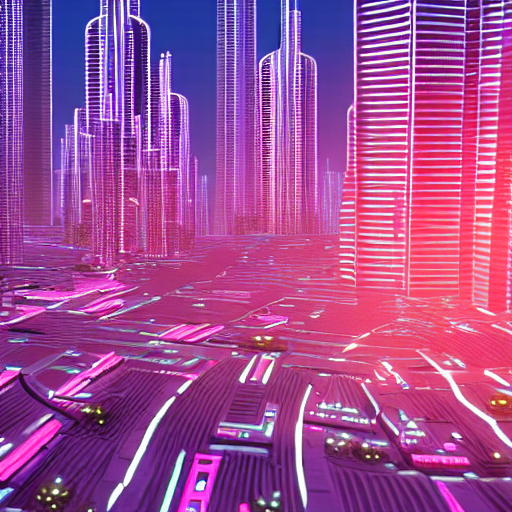

In [2]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16"
).to("cuda")
generator = torch.Generator("cuda").manual_seed(31)
image = pipeline("Futuristic cityscape at dusk, glowing neon lights, flying cars, and tall skyscrapers with glass facades, soft purple and pink hues, hyper-detailed, 8k", generator=generator).images[0]
image